# Lab03: Logistic Regression.

- Student ID: 21127113
- Student name: Dinh Duong Hai Nam

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`). Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**
- Logistic Regression.

## 1. Feature Extraction

### Import Library

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

### Load data

In [2]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', return_X_y=True, parser='auto')

In [3]:
print(X.shape, type(X))
print(y.shape, type(y))

X_np = X.to_numpy()
y_np = y.to_numpy()

(70000, 784) <class 'pandas.core.frame.DataFrame'>
(70000,) <class 'pandas.core.series.Series'>


### Extract Features

So we basically have 70000 samples with each sample having 784 features - pixels in this case and a label - the digit the image represent.

Let’s play around and see if we can extract any features from the pixels that can be more informative. First I’d like to know more about average intensity - **that is the average value of a pixel in an image for the different digits**

In [4]:
labels = np.unique(y)
# print(labels)
n_label = np.unique(y).shape[0]

# array stores average intensity for each label
l_means = X.mean(axis=1)
l_means = pd.concat([l_means, y], axis=1).groupby('class').mean()

# TODO compute average intensity for each label
print(l_means)

               0
class           
0      44.177405
1      19.406802
2      38.034208
3      36.154209
4      30.996000
5      32.950159
6      35.234865
7      29.217987
8      38.397901
9      31.359408


Plot the average intensity using matplotlib

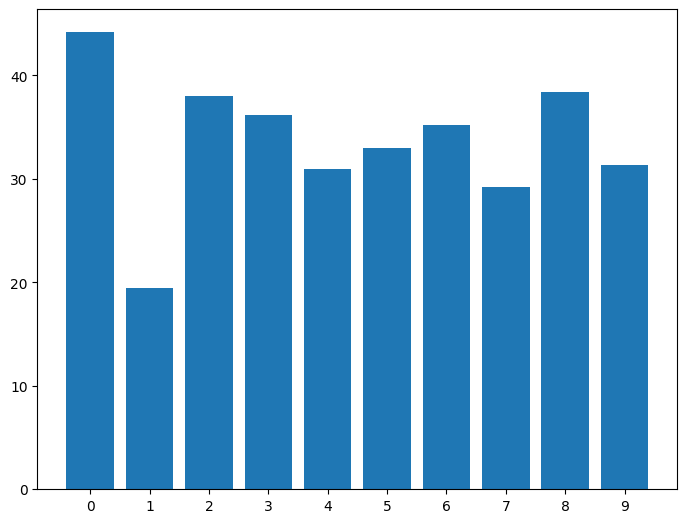

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,l_means.iloc[:,0])
plt.show()

As we can see there are some differences in intensity. The digit “1” is the less intense while the digit “0” is the most intense. So this new feature seems to have some predictive value if you wanted to know if say your digit is a “1” or not.

In [6]:
#TODO compute average intensity for each data sample
intensity = X_np.mean(axis=1)
print(intensity.shape)
print(intensity)

(70000,)
[35.10841837 39.6619898  24.7997449  ... 37.28443878 33.87627551
 53.35841837]


Sometimes people really do not know what are they doing. I am not an exception:

In [7]:
def calculate_symmetry_grayscale(image):
    # Assuming 'image' is a 1D NumPy array representing the grayscale image

    # Create a mirrored version of the image
    mirrored_image = np.flip(image)

    # Calculate pixel-wise symmetry
    symmetry_score = np.sum(np.abs(image - mirrored_image))

    # Normalize symmetry score
    symmetry = 1 - (symmetry_score / (2 * np.sum(np.abs(image))))  
    return symmetry

symmetry = np.apply_along_axis(calculate_symmetry_grayscale, axis=1, arr=X_np)

I called this feature "symmetry" (though it's not "symmetry" at all). Use visualization method to understand why this feature work.

              0
class          
0      0.485135
1      0.539071
2      0.399001
3      0.403066
4      0.407103
5      0.363520
6      0.368320
7      0.262586
8      0.461888
9      0.406346


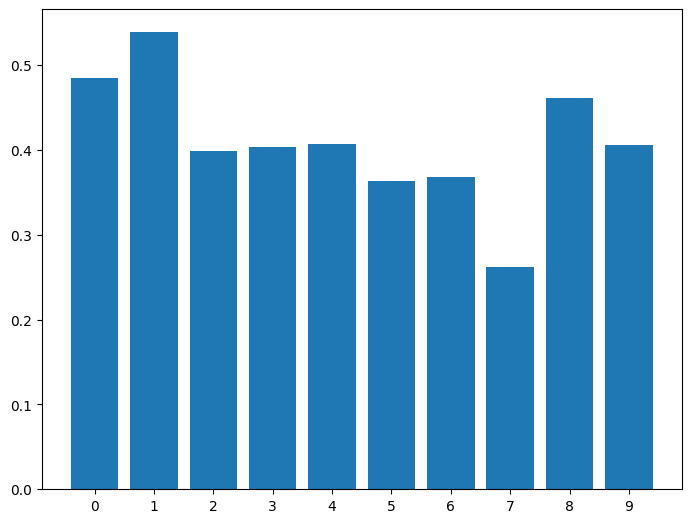

In [8]:
# Plotting Symmertry by labels
symmetry_plt = pd.concat([pd.DataFrame(symmetry), y], axis=1).groupby('class').mean()

print(symmetry_plt)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,symmetry_plt.iloc[:,0])

plt.show()

Our new trainning data will have 70000 samples and 2 features: intensity, symmetry.

In [9]:
#TODO create X_new by horizontal stack intensity and symmetry
X_new = np.hstack((intensity[:, np.newaxis], symmetry[:, np.newaxis]))

print(X_new.shape) #it should be (70000,2)
print(X_new) #it should be (70000,2)

(70000, 2)
[[35.10841837  0.50514078]
 [39.6619898   0.47969127]
 [24.7997449   0.12292342]
 ...
 [37.28443878  0.46922787]
 [33.87627551  0.39263526]
 [53.35841837  0.43587598]]


## 2. Training 

Usually logistic regression is a good first choice for classification. In this homework we use logistic regression for classifying digit 1 images and not digit 1 images.

### Normalize data
First normalize data using Z-score normalization
#### TODO: Study about Z-score normalization  
Z-score normalization, also known as standardization, is a statistical method used to rescale and center the values of a distribution by subtracting the mean and dividing by the standard deviation. This process transforms the data into a standard normal distribution with a mean of 0 and a standard deviation of 1. The formula for Z-score normalization for a data point x is given by:
$$
Z = \frac{(x−μ)}{σ}
$$
where:
- $Z$ is the Z-score.
- $x$ is the individual data point.
- $μ$ is the mean of the dataset.
- $σ$ is the standard deviation of the dataset.

#### TODO: Why should we normalize data?
Normalizing data is a common preprocessing step in data analysis, machine learning, and statistical modeling. Here are several reasons why data normalization is important:

1. **Equalize Scales:**
   - Different features in a dataset might have different scales. For example, one feature may range from 0 to 100, while another ranges from 0 to 0.1. Normalizing the data ensures that all features have the same scale, preventing some features from dominating others in algorithms or analyses.

2. **Facilitate Convergence in Optimization:**
   - In optimization algorithms, such as gradient descent, normalizing features can help the algorithm converge faster. It aids in reaching the minimum or maximum of the cost function more efficiently by ensuring that the optimization process is not dominated by features with larger scales.

3. **Improve Interpretability:**
   - Normalized data can be easier to interpret. The coefficients in linear models, for example, represent the change in the target variable for a one-unit change in the corresponding feature. If features have different scales, the coefficients may not be directly comparable.

4. **Enhance Model Performance:**
   - Many machine learning algorithms, especially those based on distance metrics (e.g., k-nearest neighbors), are sensitive to the scale of features. Normalization can lead to better performance for these algorithms by preventing certain features from having a disproportionate influence.

5. **Facilitate Comparisons:**
   - When comparing or combining datasets, it's essential that the data be on a similar scale. Normalization allows for a fair comparison between datasets and facilitates the combination of information from different sources.

6. **Avoid Numerical Instabilities:**
   - In some mathematical computations, especially those involving inversion of matrices or computation of derivatives, extreme values or large scales can lead to numerical instability. Normalizing the data can mitigate such issues.

7. **Prevent Overfitting:**
   - In machine learning models, normalization can help prevent overfitting. Regularization techniques penalize large coefficients, and without normalization, features with larger scales might be penalized more, leading to a less effective model.

8. **Handle Outliers:**
   - Normalization can make a dataset more robust to outliers. If the data contains extreme values, normalizing the features can reduce the impact of outliers on the overall model.

9. **Ease of Interpretation and Communication:**
   - Normalizing data can simplify the interpretation and communication of results, making it easier for stakeholders to understand and act upon the information provided.

In summary, normalizing data is a crucial step in data preprocessing to ensure that the data is suitable for analysis, modeling, and interpretation. It addresses issues related to different scales, improves the performance of certain algorithms, and facilitates meaningful comparisons between datasets.

In [10]:
#TODO: normalize X_new
def normalize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X_new = normalize(X_new)
print(X_new)

[[ 0.15575488  0.5942758 ]
 [ 0.56751688  0.43379815]
 [-0.77641894 -1.81588213]
 ...
 [ 0.35252406  0.36781885]
 [ 0.04433692 -0.11515315]
 [ 1.8060324   0.15751097]]


### Construct  data

In [13]:
X_new = np.hstack((np.ones((len(X_new), 1)), X_new)) #stack 1s column as usual

y_new = np.array(y).astype(int)
y_new[y_new != 1] = 0 # digit 1 -> class 1, other digits -> class 0
y_new = y_new.reshape(-1,1)
print (X_new.shape)
print (y_new.shape)

(70000, 5)
(70000, 1)


### Split data 

In [14]:
train_X, test_X, train_y, test_y = train_test_split(X_new, y_new, test_size= int(1/3*X.shape[0]))
print(train_X.shape)
print(train_y.shape)

(46667, 5)
(46667, 1)


### Sigmoid function and derivative of the sigmoid function

In [15]:
def sigmoid_activation(x):
    """compute the sigmoid activation value for a given input"""
    return 1.0 / (1 + np.exp(-x))
def sigmoid_deriv(x):
    '''compute the derivative of the sigmoid function ASSUMING
    that the input ‘x‘ has already been passed through the sigmoid
    activation function'''
    return x * (1 - x)

### Compute output

In [16]:
def compute_h(W, X):
    """
    Compute output: Take the dot product between our features ‘X‘ and the weight
    matrix ‘W‘, then pass this value through our sigmoid activation function 
    """
    return sigmoid_activation(X.dot(W))
def predict(W, X):
 
    '''Take the dot product between our features and weight matrix, 
       then pass this value through our sigmoid activation'''
    #........
    preds=sigmoid_activation(X.dot(W))
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

### Compute gradient

**Loss Function: Average negative log likelihood**
$$\mathcal{L}=\dfrac{1}{N} \sum_{i=1}^{N} -\left(y^{i}\ln h_{\mathbf{w}}\left(\mathbf{x}^{i}\right)+\left(1-y^{i}\right)\ln \left(1-h_{\mathbf{w}}\left(x^{i}\right)\right)\right) $$


$$\text{Sigmoid Activation: } z= \sigma \left(h\right)= \dfrac{1}{1+e^{-h}}$$

$$\text{Cross-entropy: } J(w)=-\left({ylog(z)+(1-y)log(1-z)}\right)$$

$$\text{Chain rule: } \dfrac{\partial J(w)}{\partial w}=\dfrac{\partial J(w)}{\partial z} \dfrac{\partial z}{\partial h}\dfrac{\partial h}{\partial w}  $$

$$\dfrac{\partial J(w)}{\partial z}=-\left(\dfrac{y}{z}-\dfrac{1-y}{1-z}\right)=\dfrac{z-y}{z(1-z)}$$

$$\dfrac{\partial z}{\partial h}=z(1-z)$$

$$\dfrac{\partial h}{\partial w}=X$$

$$\dfrac{\partial J(w)}{\partial w}=X^T(z-y)$$

In [23]:
def compute_gradient(train_X, error):
    """
    This is the gradient descent update of "average negative log likelihood" loss function. 
    In lab02 our loss function is "sum squared error".
    """
    
    #TODO
    gradient = train_X.T.dot(error) / train_X.shape[0]
    return gradient

In [19]:
def train(W,train_X, train_y, learning_rate, num_epochs, losses):
    for epoch in np.arange(0, num_epochs):
        h=compute_h(W,train_X)
        error = h - train_y
        loss = np.mean(- train_y * np.log(h) - (1 - train_y) * np.log(1 - h))
        losses.append(loss)
        gradient=compute_gradient(h, error)
        W += -learning_rate * gradient
        if ((epoch+1)%1000==0): print ('Epoch %d, loss %.3f' %(epoch+1, loss))
        
    return W

### Train our model

In [20]:
W = np.random.randn(train_X.shape[1], 1)
losses=[]
num_epochs=40000
learning_rate=0.01
W=train(W,train_X, train_y, learning_rate, num_epochs , losses)
x_preds=predict(W ,train_X)
train_err = np.mean(x_preds != train_y) * 100
print ('=' * 50)
print ('Train err of final w: ', train_err)

Epoch 1000, loss 0.390
Epoch 2000, loss 0.399
Epoch 3000, loss 0.422
Epoch 4000, loss 0.446
Epoch 5000, loss 0.471
Epoch 6000, loss 0.495
Epoch 7000, loss 0.519
Epoch 8000, loss 0.543
Epoch 9000, loss 0.566
Epoch 10000, loss 0.589
Epoch 11000, loss 0.612
Epoch 12000, loss 0.634
Epoch 13000, loss 0.656
Epoch 14000, loss 0.678
Epoch 15000, loss 0.699
Epoch 16000, loss 0.720
Epoch 17000, loss 0.742
Epoch 18000, loss 0.763
Epoch 19000, loss 0.784
Epoch 20000, loss 0.805
Epoch 21000, loss 0.825
Epoch 22000, loss 0.846
Epoch 23000, loss 0.867
Epoch 24000, loss 0.887
Epoch 25000, loss 0.908
Epoch 26000, loss 0.929
Epoch 27000, loss 0.949
Epoch 28000, loss 0.970
Epoch 29000, loss 0.990
Epoch 30000, loss 1.011
Epoch 31000, loss 1.031
Epoch 32000, loss 1.052
Epoch 33000, loss 1.072
Epoch 34000, loss 1.093
Epoch 35000, loss 1.113
Epoch 36000, loss 1.134
Epoch 37000, loss 1.155
Epoch 38000, loss 1.175
Epoch 39000, loss 1.196
Epoch 40000, loss 1.217
Train err of final w:  11.734201898557869


## 3. Evaluate our model

In [21]:
preds = predict(W, train_X)
print(classification_report(train_y, preds))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     41423
           1       0.39      0.08      0.13      5244

    accuracy                           0.88     46667
   macro avg       0.64      0.53      0.53     46667
weighted avg       0.84      0.88      0.85     46667



In [22]:
preds = predict(W, test_X)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     20700
           1       0.42      0.08      0.13      2633

    accuracy                           0.88     23333
   macro avg       0.66      0.53      0.53     23333
weighted avg       0.84      0.88      0.85     23333



**TODO: Comment on the result**

## References
### [pd.Dataframe.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)